In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [220]:
titanic = pd.read_csv("Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [221]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
titanic.drop(['PassengerId','Name','Ticket','Embarked','Cabin'],inplace=True,axis=1)

In [223]:
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


#### Missing Values for features

In [224]:
[[features,titanic[features].isnull().sum()] for features in titanic.columns if titanic[features].isnull().sum()>0]

[['Age', np.int64(177)]]

#### Heat Map for Missing Values

<Axes: >

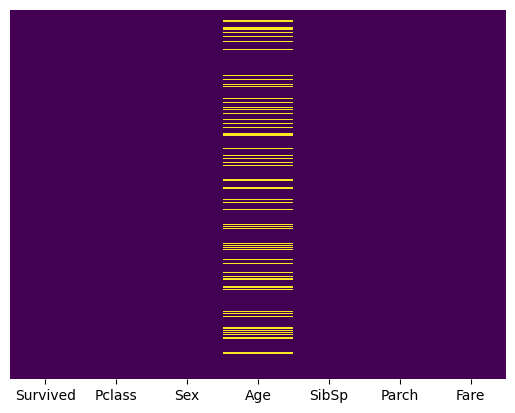

In [225]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [226]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [227]:
print(titanic.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [228]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [229]:
pd.crosstab([titanic.Sex,titanic.Survived],titanic.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [230]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Encode 'sex' column (Female → 1, Male → 0)
titanic['sex_encoded'] = titanic['sex'].map({'male': 0, 'female': 1})

print(titanic[['sex', 'sex_encoded']].head())


      sex  sex_encoded
0    male            0
1  female            1
2  female            1
3  female            1
4    male            0


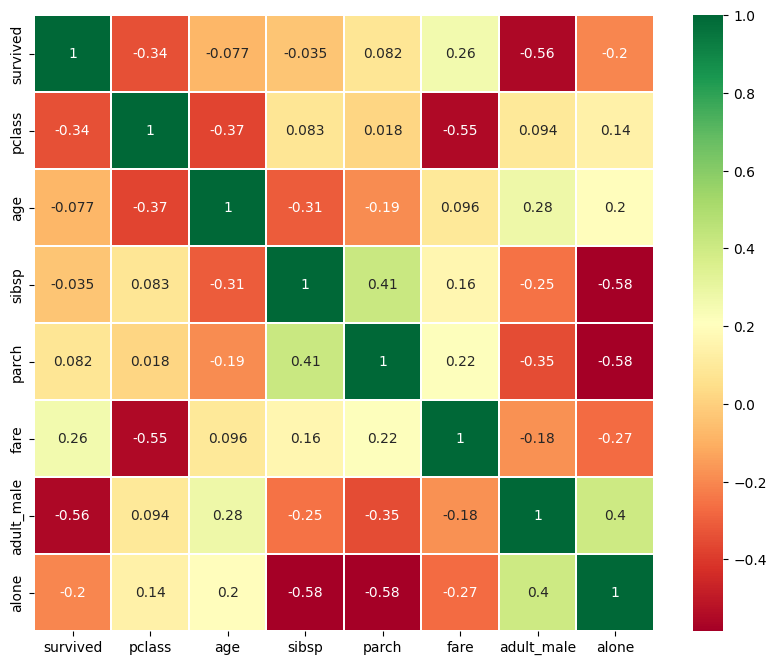

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load Titanic dataset (Ensure it's a DataFrame with numerical columns)
titanic = sns.load_dataset("titanic")

# Select only numerical columns for correlation
corr_matrix = titanic.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)

plt.show()


In [232]:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [233]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [234]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Drop NaN values in 'embarked' to avoid errors
titanic.dropna(subset=['embarked'], inplace=True)

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'embarked' column
titanic['embarked_encoded'] = le.fit_transform(titanic['embarked'])

print(titanic[['embarked', 'embarked_encoded']].head())

  embarked  embarked_encoded
0        S                 2
1        C                 0
2        S                 2
3        S                 2
4        S                 2


In [235]:
# Encode 'deck' column
titanic['deck_encoded'] = le.fit_transform(titanic['deck'])

print(titanic[['deck', 'deck_encoded']].head())

  deck  deck_encoded
0  NaN             7
1    C             2
2  NaN             7
3    C             2
4  NaN             7


In [236]:
titanic.dtypes

survived               int64
pclass                 int64
sex                   object
age                  float64
sibsp                  int64
parch                  int64
fare                 float64
embarked              object
class               category
who                   object
adult_male              bool
deck                category
embark_town           object
alive                 object
alone                   bool
embarked_encoded       int64
deck_encoded           int64
dtype: object

In [237]:
titanic.isnull().sum()

survived              0
pclass                0
sex                   0
age                 177
sibsp                 0
parch                 0
fare                  0
embarked              0
class                 0
who                   0
adult_male            0
deck                688
embark_town           0
alive                 0
alone                 0
embarked_encoded      0
deck_encoded          0
dtype: int64

In [238]:
X = titanic.drop(['survived','sex','embarked',], axis=1)
y = titanic['survived']

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70 , test_size = 0.30, random_state = 1, shuffle=True)

In [241]:
from sklearn import tree
#classifier = tree.DecisionTreeClassifier()
classifier = tree.DecisionTreeClassifier(max_depth=3)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ValueError: Cannot cast object dtype to float32

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
accuracy_score(y_test, y_pred)

0.7873134328358209

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[135,  18],
       [ 39,  76]], dtype=int64)

Text(33.0, 0.5, 'Truth')

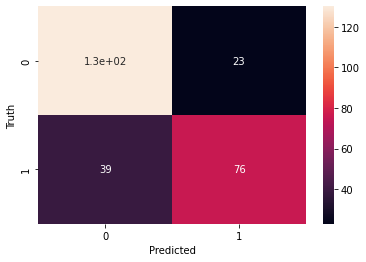

In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       153
           1       0.81      0.66      0.73       115

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



#### References

https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook

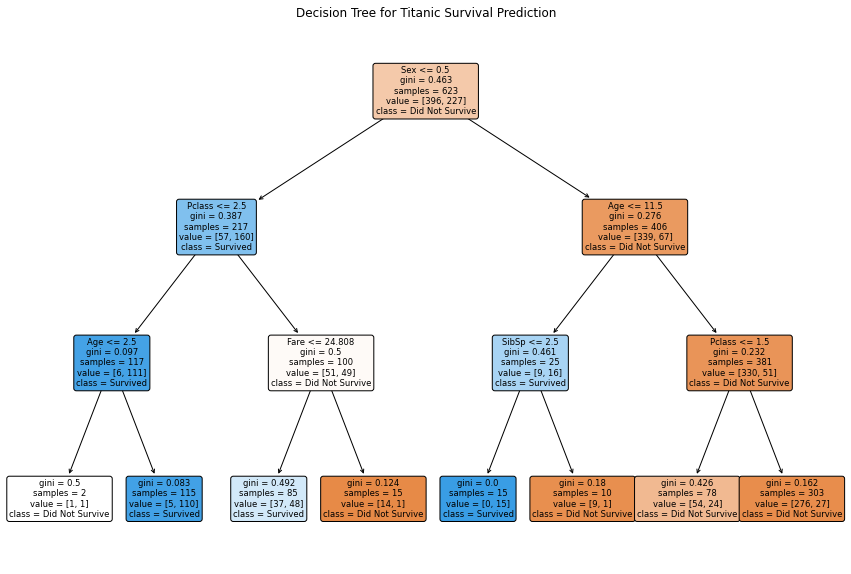

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['Did Not Survive', 'Survived'], rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()